In [1]:
!pip install transformers

In [4]:
from transformers import AutoConfig, AutoModel, AutoTokenizer

## 遠端下載模型

In [5]:
model = AutoModel.from_pretrained("hfl/rbt3", force_download=True)

config.json:   0%|          | 0.00/828 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/828 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/156M [00:00<?, ?B/s]

In [6]:
# 模型可能會太肥
!git clone "https://huggingface.co/hfl/rbt3"

Cloning into 'rbt3'...
remote: Enumerating objects: 48, done.
remote: Total 48 (delta 0), reused 0 (delta 0), pack-reused 48
Unpacking objects: 100% (48/48), 156.45 KiB | 5.59 MiB/s, done.
Filtering content: 100% (3/3), 442.86 MiB | 43.08 MiB/s, done.


In [ ]:
# 只下載 pytorch model
!git lfs clone "https://huggingface.co/hfl/rbt3" --include="*.bin" ./rbt3_only_pytorch

          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
Cloning into './rbt3_only_pytorch'...
remote: Enumerating objects: 48, done.
remote: Total 48 (delta 0), reused 0 (delta 0), pack-reused 48
Unpacking objects: 100% (48/48), 156.45 KiB | 3.33 MiB/s, done.


In [ ]:
!du -sh /content/rbt3

887M	/content/rbt3


In [ ]:
!du -sh /content/rbt3_only_pytorch

300M	/content/rbt3_only_pytorch


## 載入地端模型

In [7]:
model = AutoModel.from_pretrained("rbt3")


In [8]:
model.config

BertConfig {
  "_name_or_path": "rbt3",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 3,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

## 下載 model 參數

In [ ]:
## 下載參數

In [9]:
model = AutoModel.from_pretrained("rbt3",output_attentions = True)
model.config

BertConfig {
  "_name_or_path": "rbt3",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 3,
  "output_attentions": true,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

In [10]:
config = AutoConfig.from_pretrained("./rbt3/")
config.output_attentions

False

In [11]:
from transformers import BertConfig

## 模型套用

In [13]:
sen = "和尚端湯上塔，塔滑湯撒, 湯燙塔"
tokenizer = AutoTokenizer.from_pretrained("rbt3")
inputs = tokenizer(sen, return_tensors="pt")
inputs


{'input_ids': tensor([[ 101, 1469, 2213, 4999, 3966,  677, 1849, 8024, 1849, 3998, 3966, 3054,
          117, 3966, 4243, 1849,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

## 不裝載 Model Head的模型套用

- last_hidden_state
- pooler_output
- attentions


In [12]:
model = AutoModel.from_pretrained("rbt3", output_attentions=True)

In [14]:
output = model(**inputs)
output


BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 7.6000e-02,  7.4902e-01,  2.1058e-01,  ..., -8.9430e-02,
          -7.2620e-02, -2.6937e-02],
         [ 2.1558e-01, -6.8115e-04, -2.8483e-01,  ..., -3.2584e-01,
          -8.7078e-01,  1.9816e-01],
         [ 3.1478e-01,  7.2096e-02, -4.2713e-01,  ..., -6.3416e-02,
           2.2966e-01,  2.2270e-01],
         ...,
         [ 2.8685e-01,  3.4777e-01, -6.2212e-01,  ..., -6.7809e-01,
          -2.4036e-01,  1.7224e-01],
         [ 3.6874e-01, -2.7946e-02, -7.5840e-01,  ..., -5.1737e-01,
          -3.9014e-01, -5.1046e-02],
         [ 6.8282e-02,  7.5036e-01,  2.0625e-01,  ..., -8.5256e-02,
          -7.1376e-02, -2.2247e-02]]], grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[ 0.1188, -0.9993, -1.0000, -0.6463,  0.7281, -0.1013, -0.0790, -0.1773,
          0.9987,  0.9984,  0.2124, -1.0000, -0.1855,  0.9998, -1.0000,  0.9999,
          0.9018,  0.8970, -0.9717, -0.0835, -0.9113, -0.8556,  0.0084,  0.981

In [15]:
output.keys()
'''
以下列句子為例搭配 rbt3 模型
"和尚端湯上塔，塔滑湯撒, 湯燙塔"
output.attentions[0].shape = torch.Size([1, 12, 17, 17])

'''
# 輸出參數解釋


'\n以下列句子為例搭配 rbt3 模型\n"和尚端湯上塔，塔滑湯撒, 湯燙塔"\noutput.attentions[0].shape = torch.Size([1, 12, 17, 17])\n\n'

## BERT模型組件及其關係

BERT（Bidirectional Encoder Representations from Transformers）是由Google開發的流行預訓練自然語言處理（NLP）模型。BERT模型的輸出通常包括三個關鍵部分，如下所示：

1. `last_hidden_state`（最後隱藏狀態）：
   - `last_hidden_state`是一個張量，表示輸入序列中每個標記的最終隱藏狀態。在BERT中，標記通常表示為WordPiece標記或通過一個稱為WordPiece標記化的過程獲得的子詞標記。
   - `last_hidden_state`是在輸入文本通過BERT的變換器架構的多個層處理後獲得的。
   - `last_hidden_state`的形狀為[batch_size, sequence_length, hidden_size]，其中：
     - `batch_size`是批處理中的輸入樣本數。
     - `sequence_length`是輸入的最大序列長度。
     - `hidden_size`是隱藏狀態的維度，它取決於特定的BERT模型變種（例如，BERT-base的維度為768，而BERT-large的維度為1024）。
   - `last_hidden_state`張量中的每個元素對應於輸入序列中的特定標記，並編碼有關該標記在句子中的上下文含義的信息。

2. `pooler_output`（池化輸出）：
   - `pooler_output`是一個張量，表示從`last_hidden_state`中汇总的整個輸入序列的信息。通常，這個張量用作整個輸入句子的嵌入，並用於下游任務，如文本分類和句子級嵌入。
   - `pooler_output`是通過對`last_hidden_state`沿著序列維度應用池化操作（例如，均值池化或最大池化）獲得的。
   - `pooler_output`張量的形狀為[batch_size, hidden_size]，其中`batch_size`是輸入樣本的數量，`hidden_size`與`last_hidden_state`的隱藏大小相同。

3. `attentions`（注意力）：
   - `attentions`組件是一個注意力張量的列表，每個列表對應於BERT模型的每一層。每個注意力張量提供了輸入序列中不同層次的標記之間如何關注彼此的信息。
   - 這些注意力張量的形狀為[batch_size, num_heads, sequence_length, sequence_length]，其中：
     - `batch_size`是輸入樣本的數量。
     - `num_heads`是多頭自注意力機制中的注意力頭數（例如，BERT-base有12個頭，BERT-large有16個頭）。
     - `sequence_length`是輸入的最大序列長度。
   - 注意力機制捕捉標記之間的依賴關係，有助於BERT理解句子中單詞之間的關係，這對於捕捉句法和語義信息至關重要。

`last_hidden_state`包含標記級別的表示，
`pooler_output`提供句子級別的表示，
而`attentions`提供了有關標記在多頭注意力機制中如何相互交互的見解。


## 注意力權重視覺化

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# https://colab.research.google.com/github/willismax/matplotlib_show_chinese_in_colab/blob/master/matplotlib_show_chinese_in_colab.ipynb#scrollTo=RfR0uymWF3cB
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

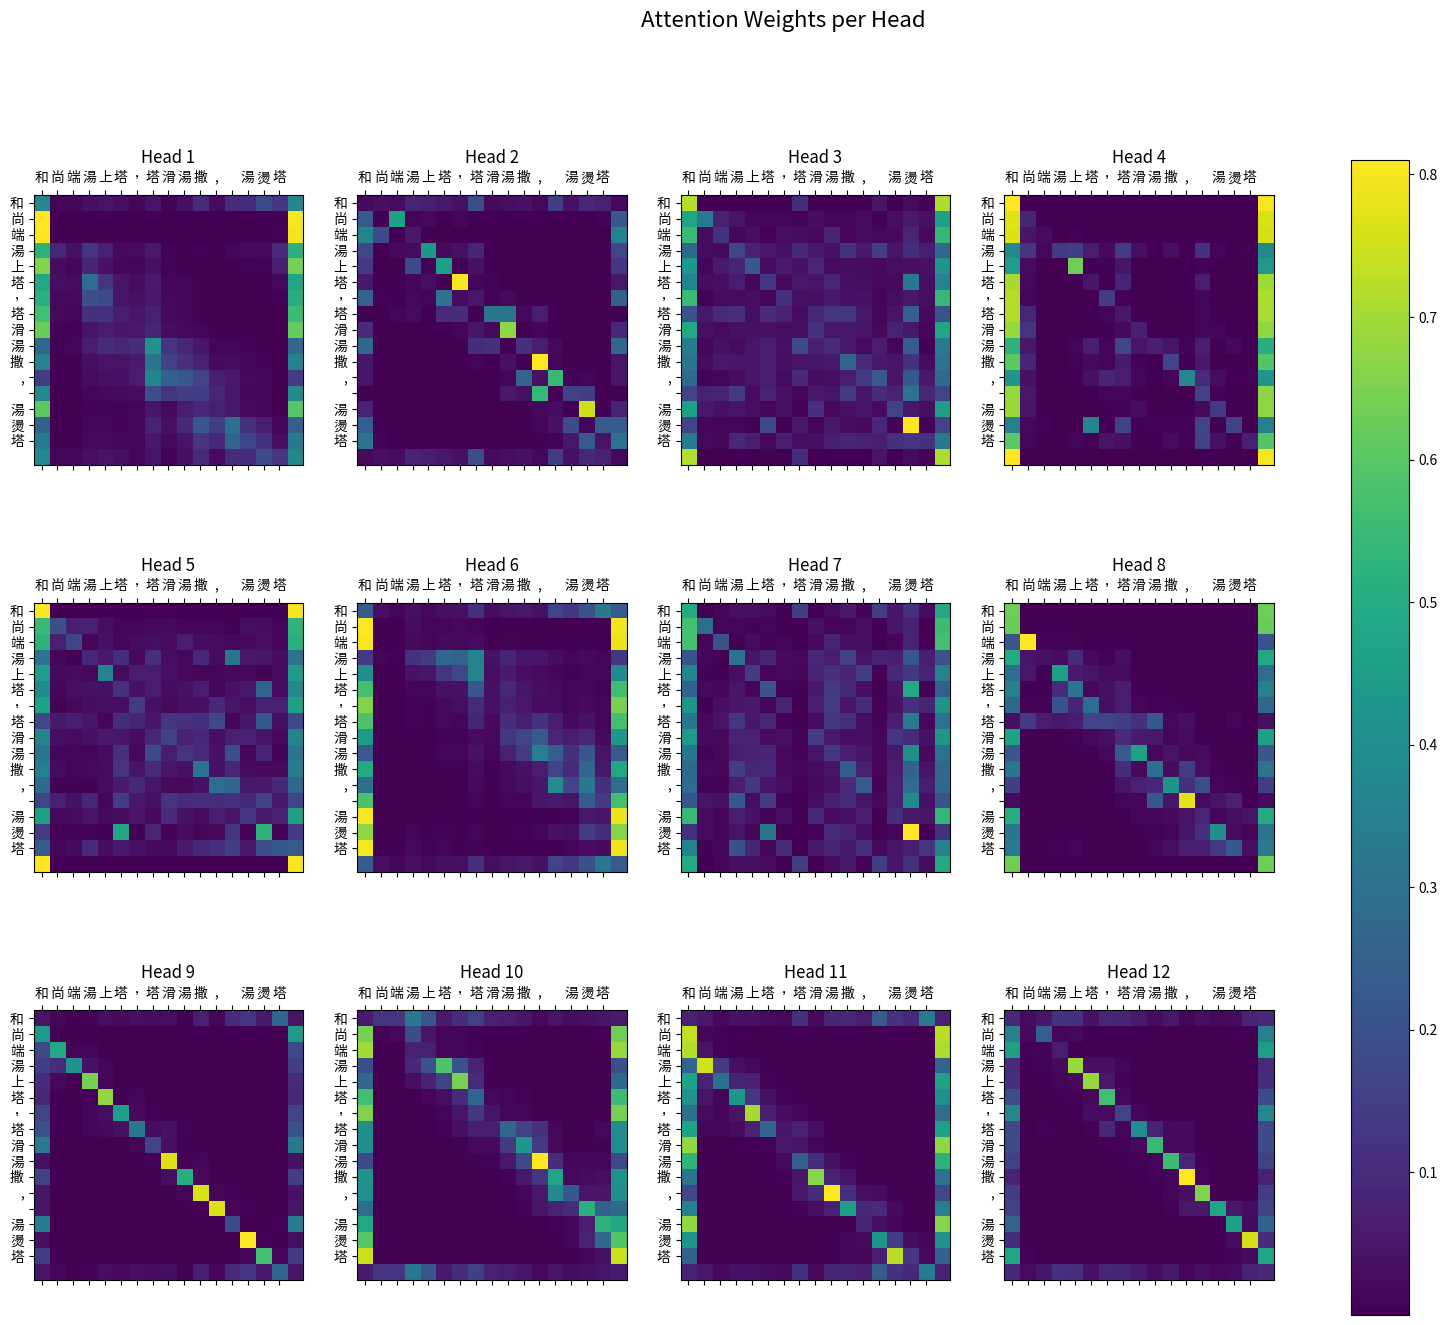

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# 假設 output.attentions 是模型輸出的注意力權重
# 注意：這裡使用的是示例數據。在實際情況中，您應該使用模型輸出的注意力權重
attention_head = len(output.attentions[0][0])
attention_layer = -1

# 創建一個3行4列的子圖
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# 遍歷每個注意力頭，繪製對應的熱力圖
for i in range(attention_head):
    # 獲取特定層和注意力頭的注意力權重
    # 在實際應用中，您應該從模型輸出中獲取這些數據
    attention = output.attentions[attention_layer][0, i].detach().numpy()

    # 繪製每個注意力頭的熱力圖
    ax = axes[i // 4, i % 4]  # 獲取當前子圖的位置
    im = ax.matshow(attention, cmap='viridis')
    ax.set_title(f'Head {i+1}')
    ax.set_xticks(range(len(sen)))
    ax.set_xticklabels(list(sen))
    ax.set_yticks(range(len(sen)))
    ax.set_yticklabels(list(sen))

# 添加整個圖表的標題
fig.suptitle('Attention Weights per Head', fontsize=16)

# 添加一個顏色條
fig.colorbar(im, ax=axes.ravel().tolist())

# 顯示圖表
plt.show()


In [ ]:
output.attentions[0].shape


torch.Size([1, 12, 17, 17])

## 裝載 Model Head的模型套用 (實務運用)
- 分類模型

In [17]:
from transformers import AutoModelForSequenceClassification, BertForSequenceClassification

In [18]:
clz_model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
clz_model.save_pretrained("./roberta_chinese")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/409M [00:00<?, ?B/s]

In [19]:
clz_model.config

BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.35.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

In [20]:
inputs

{'input_ids': tensor([[ 101, 1469, 2213, 4999, 3966,  677, 1849, 8024, 1849, 3998, 3966, 3054,
          117, 3966, 4243, 1849,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [21]:
result = clz_model(**inputs)
result

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.0837, -0.2103]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

## 輸出結果轉換

In [22]:
import torch
pred = torch.softmax(result.logits, dim=-1)
pred_result = pred.argmax().item()
clz_model.config.id2label[pred_result]

'negative (stars 1, 2 and 3)'

## huggingface model 完整模型套用 範例

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# "hfl/rbt3", force_download=True
def predict_class(text, model_name="roberta_chinese"):
    # Load the model
    cls_model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

    # Load the tokenizer
    tokenizer = AutoTokenizer.from_pretrained("./rbt3")

    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt")

    # Get model predictions
    result = cls_model(**inputs)
    pred = torch.softmax(result.logits, dim=-1)
    pred_result = pred.argmax().item()

    # Map the predicted class index to a label
    label = cls_model.config.id2label[pred_result]

    return label

# Check GPU status
def check_gpu_status():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
        return 'Not connected to a GPU'
    else:
        return gpu_info

# Example usage
if __name__ == "__main__":
    text = "你很行是吧！給你點顏色瞧瞧"
    gpu_status = check_gpu_status()
    print("GPU Status:", gpu_status)

    prediction = predict_class(text)
    print("Predicted Class:", prediction)


GPU Status: /bin/bash: line 1: nvidia-smi: command not found
Predicted Class: negative (stars 1, 2 and 3)


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

def predict_class(text, model_name="rbt3", labels = ['很差', '差', '中', '好', '非常好']):
    # Define class labels
    # labels = ['很差', '差', '中', '好', '非常好']

    # Load the model with specified number of labels and id2label mapping
    id2label = {i: label for i, label in enumerate(labels)}
    cls_model = AutoModelForSequenceClassification.from_pretrained(
        model_name, num_labels=len(labels), id2label=id2label, ignore_mismatched_sizes=True)

    # reset cls layer
    cls_model.classifier = torch.nn.Linear(cls_model.config.hidden_size, len(labels))

    # Load the tokenizer
    tokenizer = AutoTokenizer.from_pretrained("./rbt3")

    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt")

    # Get model predictions
    result = cls_model(**inputs)
    pred = torch.softmax(result.logits, dim=-1)
    pred_result = pred.argmax().item()

    # Map the predicted class index to a label
    label = cls_model.config.id2label[pred_result]

    return label

# Check GPU status
def check_gpu_status():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
        return 'Not connected to a GPU'
    else:
        return gpu_info

# Example usage
if __name__ == "__main__":
    text = "你很行是吧！給你點顏色瞧瞧!!"
    gpu_status = check_gpu_status()
    print("GPU Status:", gpu_status)

    prediction = predict_class(text)
    print("Predicted Class:", prediction)


GPU Status: /bin/bash: line 1: nvidia-smi: command not found


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at rbt3 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted Class: 差
